# MVP - Engenharia de Dados
## Autor: Marcel Antonio Lopes Pereira

## 1. Análise e solução do problema

Com a camada gold devidamente estruturada, podemos agora responder às perguntas propostas sobre a dominância das seleções nacionais ao longo da história do futebol. A camada foi construída para oferecer uma visão consolidada e de fácil acesso aos dados, garantindo que possamos explorar estatísticas detalhadas sobre desempenho das equipes, evolução no ranking da FIFA e impacto dos torneios ao longo do tempo.

As perguntas a serem respondidas abrangem diversos aspectos da performance das seleções, incluindo vitórias, histórico de confrontos, impacto do ranking FIFA nos resultados e outros fatores relevantes. Utilizando consultas SQL, extrairemos insights que nos permitirão entender melhor quais seleções demonstraram maior domínio ao longo da história.

A seguir, responderemos cada pergunta com uma abordagem detalhada, utilizando as tabelas da camada gold. Sempre que possível, complementaremos as respostas com visualizações para tornar os insights mais intuitivos.



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo visual do Seaborn
sns.set(style="whitegrid")

### 1.1 **Qual seleção tem o maior número de vitórias em jogos oficiais e amistosos?**  
A fim de destacar as seleções mais vitoriosas, cada consulta foi estruturada para listar os 10 países com o maior número de vitórias. Essa abordagem permite identificar as equipes com maior consistência histórica, tanto em um contexto geral quanto separadamente para jogos oficiais e amistosos. Ao segmentar os resultados dessa forma, é possível evidenciar quais seleções dominaram diferentes tipos de competições ao longo do tempo.

Inicialmente são destacadas as 10 seleções com mais vitórias no geral.

In [0]:
%sql
SELECT team, COUNT(*) AS total_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score
) AS victories
GROUP BY team
ORDER BY total_wins DESC
LIMIT 10;


team,total_wins
Brazil,665
England,616
Germany,590
Argentina,581
Sweden,537
South Korea,530
Mexico,503
Italy,468
France,468
Hungary,466


Em seguida são listadas as 10 seleções com mais vitórias em jogos oficiais (visando alguma classificação ou disputa de troféu).

In [0]:
%sql
SELECT team, COUNT(*) AS official_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score AND tournament != 'Friendly'
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score AND tournament != 'Friendly'
) AS official_victories
GROUP BY team
ORDER BY official_wins DESC
LIMIT 10;



team,official_wins
South Korea,387
England,382
Argentina,381
Brazil,367
Uruguay,295
Scotland,291
Sweden,284
Mexico,284
Japan,280
Germany,278


E por último são listadas as 10 seleções com mais vitórias em partidas amistosas (Friendly).

In [0]:
%sql
SELECT team, COUNT(*) AS friendly_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score AND tournament = 'Friendly'
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score AND tournament = 'Friendly'
) AS friendly_victories
GROUP BY team
ORDER BY friendly_wins DESC
LIMIT 10;


team,friendly_wins
Germany,312
Brazil,298
Hungary,270
Sweden,253
England,234
France,221
Poland,220
Mexico,219
Argentina,200
Netherlands,197


In [0]:
# Vitórias totais
df_total_wins = spark.sql("""
SELECT team, COUNT(*) AS total_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score
) AS victories
GROUP BY team
ORDER BY total_wins DESC
LIMIT 10
""")

# Vitórias em jogos oficiais
df_official_wins = spark.sql("""
SELECT team, COUNT(*) AS official_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score AND tournament != 'Friendly'
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score AND tournament != 'Friendly'
) AS official_victories
GROUP BY team
ORDER BY official_wins DESC
LIMIT 10
""")

# Vitórias em amistosos
df_friendly_wins = spark.sql("""
SELECT team, COUNT(*) AS friendly_wins
FROM (
    SELECT home_team AS team FROM gold.match_performance
    WHERE home_score > away_score AND tournament = 'Friendly'
    UNION ALL
    SELECT away_team AS team FROM gold.match_performance
    WHERE away_score > home_score AND tournament = 'Friendly'
) AS friendly_victories
GROUP BY team
ORDER BY friendly_wins DESC
LIMIT 10
""")


In [0]:
pdf_total_wins = df_total_wins.toPandas()
pdf_official_wins = df_official_wins.toPandas()
pdf_friendly_wins = df_friendly_wins.toPandas()

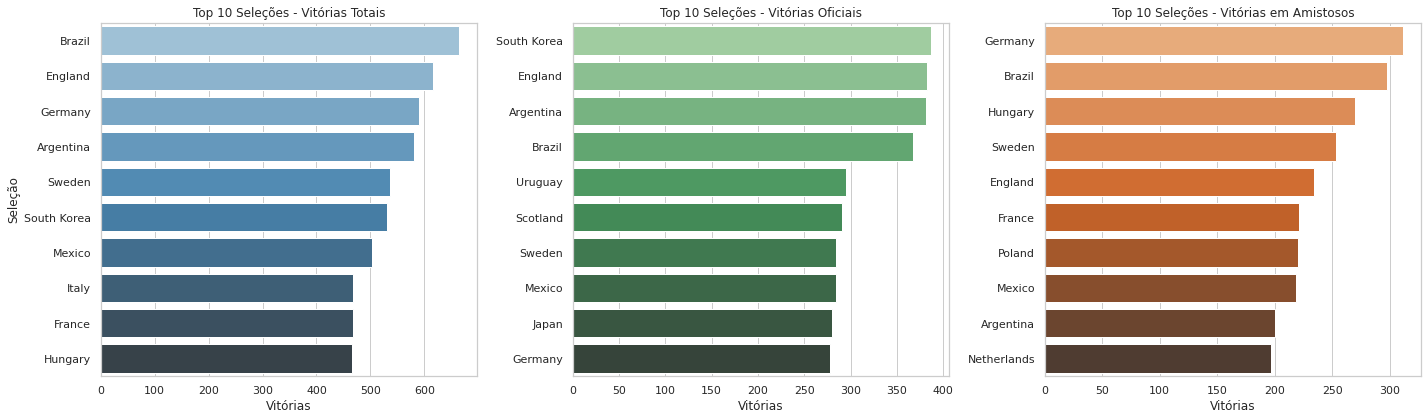

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Total de vitórias
sns.barplot(
    ax=axs[0],
    data=pdf_total_wins,
    y="team",
    x="total_wins",
    palette="Blues_d"
)
axs[0].set_title("Top 10 Seleções - Vitórias Totais")
axs[0].set_xlabel("Vitórias")
axs[0].set_ylabel("Seleção")

# Vitórias em jogos oficiais
sns.barplot(
    ax=axs[1],
    data=pdf_official_wins,
    y="team",
    x="official_wins",
    palette="Greens_d"
)
axs[1].set_title("Top 10 Seleções - Vitórias Oficiais")
axs[1].set_xlabel("Vitórias")
axs[1].set_ylabel("")

# Vitórias em amistosos
sns.barplot(
    ax=axs[2],
    data=pdf_friendly_wins,
    y="team",
    x="friendly_wins",
    palette="Oranges_d"
)
axs[2].set_title("Top 10 Seleções - Vitórias em Amistosos")
axs[2].set_xlabel("Vitórias")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()


A análise apresenta as 10 seleções mais vitoriosas da história do futebol internacional, considerando **todos os tipos de jogos**, bem como uma separação entre **competições oficiais** e **amistosos**.

#### ✅ Vitórias Totais
A seleção **brasileira** lidera o ranking geral de vitórias, refletindo sua tradição vencedora ao longo das décadas. Logo atrás estão **Inglaterra**, **Alemanha** e **Argentina** — seleções historicamente fortes em ambos os cenários (amistosos e competições oficiais). O destaque vai também para a **Suécia** e a **Coreia do Sul**, que mostram consistência em número absoluto de triunfos.

#### 🏆 Vitórias em Jogos Oficiais
Neste recorte, a liderança é ocupada pela **Coreia do Sul**, com um número elevado de vitórias em competições oficiais, o que reflete sua frequência em torneios continentais e classificatórias asiáticas. Em seguida, aparecem **Inglaterra**, **Argentina** e **Brasil**, todos com campanhas sólidas em Copas do Mundo, Eliminatórias e torneios continentais. O **Uruguai** e a **Escócia** também se destacam por sua performance histórica.

#### 🤝 Vitórias em Amistosos
A **Alemanha** aparece como a seleção com maior número de vitórias em amistosos, seguida de perto por **Brasil** e **Hungria**. Isso indica não apenas tradição, mas também uma alta frequência de jogos amistosos disputados. Outros destaques incluem **Suécia**, **França** e **Polônia**, que acumulam muitos triunfos em partidas preparatórias ao longo da história.

---

### 🧠 Insight Geral
Ao separar os contextos dos jogos, percebemos que algumas seleções mantêm alta performance tanto em amistosos quanto em jogos oficiais (**Brasil**, **Argentina** e **Inglaterra**), enquanto outras se sobressaem em um dos dois cenários. Isso mostra não apenas a tradição futebolística, mas também a frequência com que essas seleções participam de jogos internacionais e sua regularidade em competições.


A análise dos dados revela nuances importantes sobre o desempenho histórico das seleções nacionais. O Brasil lidera em número total de vitórias, reflexo de sua regularidade ao longo das décadas e de sua tradição como uma das potências do futebol mundial. No entanto, ao segmentarmos os dados por tipo de partida, surgem novas perspectivas sobre a dominância das seleções.

Na análise de partidas oficiais, a Coreia do Sul se destaca como a seleção com mais vitórias, superando até mesmo potências tradicionais como Brasil, Argentina e Alemanha. Isso sugere que a equipe sul-coreana tem um histórico de participação constante e bem-sucedida em torneios competitivos, especialmente dentro de sua confederação. O destaque da Inglaterra e da Argentina nesse ranking reforça sua consistência em torneios oficiais ao longo do tempo.

Já nos amistosos, a Alemanha assume a liderança, indicando sua capacidade de manter um alto nível de desempenho mesmo em partidas não vinculadas a competições formais. Esse dado pode estar associado à estratégia da seleção alemã de enfrentar adversários fortes em amistosos preparatórios, além da frequência com que participa desses jogos. O Brasil, que aparece em segundo lugar nessa categoria, também mostra um histórico expressivo em confrontos amistosos, refletindo sua tradição de testar diferentes formações e estilos de jogo nessas partidas.

Ao comparar as diferentes listas, percebe-se que algumas seleções mantêm um desempenho equilibrado tanto em partidas oficiais quanto amistosas, como Brasil, Inglaterra, Argentina e Suécia, enquanto outras apresentam um desempenho mais específico dependendo do contexto da competição, como a Coreia do Sul e o Uruguai em torneios oficiais, ou a Hungria e a Polônia em amistosos.

### 2. **Qual seleção tem a melhor taxa de aproveitamento (pontos ganhos por jogo)?**
Para garantir uma análise detalhada e comparável ao longo da história, as consultas SQL calcularão a taxa de aproveitamento das seleções em três cenários distintos: todas as partidas, apenas jogos oficiais e exclusivamente amistosos. A eficiência das equipes será medida pela média de pontos conquistados por jogo, adotando um critério unificado de pontuação (3 pontos por vitória, 1 por empate e 0 por derrota), padronizando diferentes períodos e formatos de torneios. Além disso, para assegurar que os rankings reflitam um desempenho consistente, apenas seleções com pelo menos 100 partidas disputadas foram consideradas, evitando distorções causadas por amostras pequenas e permitindo uma comparação mais fiel entre os diferentes contextos competitivos.

In [0]:
%sql
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team,
           match_id,
           CASE 
               WHEN home_score > away_score THEN 3
               WHEN home_score = away_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
    UNION ALL
    SELECT away_team AS team,
           match_id,
           CASE 
               WHEN away_score > home_score THEN 3
               WHEN away_score = home_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
) AS all_matches
GROUP BY team
HAVING COUNT(match_id) >= 100
ORDER BY avg_points_per_game DESC
LIMIT 10;

team,avg_points_per_game,total_games
Brazil,2.11,1047
Jersey,2.05,232
Spain,1.99,771
Germany,1.95,1019
Iran,1.95,602
England,1.95,1078
Guernsey,1.92,240
Argentina,1.89,1055
Italy,1.87,881
South Korea,1.85,995


In [0]:
%sql
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team,
           match_id,
           CASE 
               WHEN home_score > away_score THEN 3
               WHEN home_score = away_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
    WHERE tournament != 'Friendly'
    UNION ALL
    SELECT away_team AS team,
           match_id,
           CASE 
               WHEN away_score > home_score THEN 3
               WHEN away_score = home_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
    WHERE tournament != 'Friendly'
) AS official_matches
GROUP BY team
HAVING COUNT(match_id) >= 300
ORDER BY avg_points_per_game DESC
LIMIT 10;


team,avg_points_per_game,total_games
Germany,2.15,429
Spain,2.1,425
Iran,2.05,391
Brazil,2.02,610
Netherlands,2.01,410
England,2.0,653
France,1.96,427
South Korea,1.94,687
Italy,1.94,487
Russia,1.91,374


In [0]:
%sql
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team,
           match_id,
           CASE 
               WHEN home_score > away_score THEN 3
               WHEN home_score = away_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
    WHERE tournament = 'Friendly'
    UNION ALL
    SELECT away_team AS team,
           match_id,
           CASE 
               WHEN away_score > home_score THEN 3
               WHEN away_score = home_score THEN 1
               ELSE 0 
           END AS points
    FROM gold.match_performance
    WHERE tournament = 'Friendly'
) AS friendly_matches
GROUP BY team
HAVING COUNT(match_id) >= 100
ORDER BY avg_points_per_game DESC
LIMIT 10;


team,avg_points_per_game,total_games
Brazil,2.24,437
Argentina,1.88,372
England,1.88,425
Spain,1.86,346
Croatia,1.8,142
Germany,1.8,590
Italy,1.77,394
Iran,1.76,211
Russia,1.69,362
Morocco,1.69,229


In [0]:
# Exemplo com Spark SQL
df_geral = spark.sql("""
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team, match_id,
           CASE WHEN home_score > away_score THEN 3
                WHEN home_score = away_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance
    UNION ALL
    SELECT away_team AS team, match_id,
           CASE WHEN away_score > home_score THEN 3
                WHEN away_score = home_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance
) AS all_matches
GROUP BY team
HAVING COUNT(match_id) >= 100
ORDER BY avg_points_per_game DESC
LIMIT 10
""")

df_oficial = spark.sql("""
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team, match_id,
           CASE WHEN home_score > away_score THEN 3
                WHEN home_score = away_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance WHERE tournament != 'Friendly'
    UNION ALL
    SELECT away_team AS team, match_id,
           CASE WHEN away_score > home_score THEN 3
                WHEN away_score = home_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance WHERE tournament != 'Friendly'
) AS official_matches
GROUP BY team
HAVING COUNT(match_id) >= 300
ORDER BY avg_points_per_game DESC
LIMIT 10
""")

df_amistoso = spark.sql("""
SELECT team,
       ROUND(SUM(points) / COUNT(match_id), 2) AS avg_points_per_game,
       COUNT(match_id) AS total_games
FROM (
    SELECT home_team AS team, match_id,
           CASE WHEN home_score > away_score THEN 3
                WHEN home_score = away_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance WHERE tournament = 'Friendly'
    UNION ALL
    SELECT away_team AS team, match_id,
           CASE WHEN away_score > home_score THEN 3
                WHEN away_score = home_score THEN 1 ELSE 0 END AS points
    FROM gold.match_performance WHERE tournament = 'Friendly'
) AS friendly_matches
GROUP BY team
HAVING COUNT(match_id) >= 100
ORDER BY avg_points_per_game DESC
LIMIT 10
""")


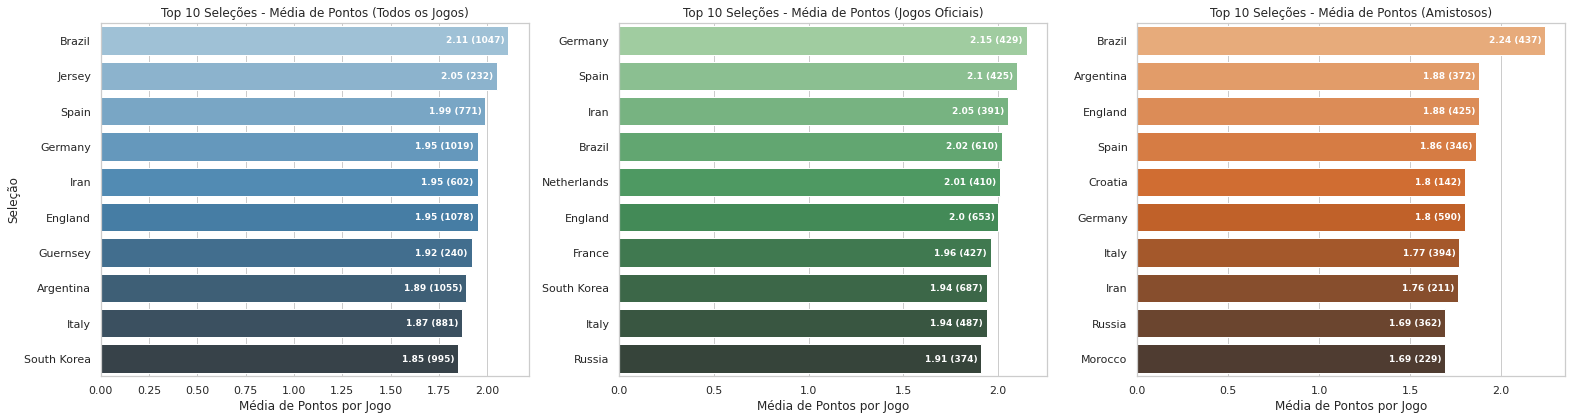

In [0]:
# Convertemos para Pandas
pdf_geral = df_geral.toPandas()
pdf_oficial = df_oficial.toPandas()
pdf_amistoso = df_amistoso.toPandas()

# Criamos os rótulos
pdf_geral["label"] = pdf_geral["avg_points_per_game"].round(2).astype(str) + \
                     " (" + pdf_geral["total_games"].astype(str) + ")"

pdf_oficial["label"] = pdf_oficial["avg_points_per_game"].round(2).astype(str) + \
                       " (" + pdf_oficial["total_games"].astype(str) + ")"

pdf_amistoso["label"] = pdf_amistoso["avg_points_per_game"].round(2).astype(str) + \
                        " (" + pdf_amistoso["total_games"].astype(str) + ")"

# Criamos os gráficos
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Lista com dados e títulos
graficos = [
    (pdf_geral, "Top 10 Seleções - Média de Pontos (Todos os Jogos)", "Blues_d"),
    (pdf_oficial, "Top 10 Seleções - Média de Pontos (Jogos Oficiais)", "Greens_d"),
    (pdf_amistoso, "Top 10 Seleções - Média de Pontos (Amistosos)", "Oranges_d")
]

for i, (df, titulo, paleta) in enumerate(graficos):
    ax = axs[i]
    sns.barplot(
        ax=ax,
        data=df,
        y="team",
        x="avg_points_per_game",
        palette=paleta
    )
    ax.set_title(titulo)
    ax.set_xlabel("Média de Pontos por Jogo")

    # Mostra o nome do eixo 'Seleção' apenas no primeiro gráfico
    if i == 0:
        ax.set_ylabel("Seleção")
    else:
        ax.set_ylabel("")

    # Adiciona os rótulos dentro das barras, com contraste
    for j, row in df.iterrows():
        ax.text(
            row["avg_points_per_game"] - 0.02,  # posicionamento à esquerda
            j,
            row["label"],
            color="white",
            va="center",
            ha="right",
            fontsize=9,
            fontweight="bold"
        )

plt.tight_layout()
plt.show()


Para medir a eficiência histórica das seleções, foi calculada a média de pontos conquistados por jogo (3 pontos por vitória, 1 por empate e 0 por derrota), considerando três cenários distintos: todas as partidas, apenas jogos oficiais e apenas amistosos. Seleções com menos de 100 jogos foram filtradas para garantir maior confiabilidade na análise.

Os destaques observados foram:

- **Brasil** lidera o ranking geral com **2,11 pontos por jogo** em mais de 1.000 partidas, mostrando sua regularidade histórica.
- **Jersey** e **Guernsey** possuem médias altas, mas com número reduzido de jogos — o que exige cautela na interpretação.
- Em **jogos oficiais**, **Alemanha** se destaca com **2,15 pontos por jogo**, seguida por **Espanha** e **Irã**.
- Nos **amistosos**, o Brasil volta a liderar com **2,24 pontos por partida**, refletindo sua consistência também em contextos menos competitivos.

Esses resultados reforçam o domínio de seleções como **Brasil**, **Alemanha**, **Espanha** e **Inglaterra** em diferentes contextos, além de evidenciar como o desempenho pode variar entre competições formais e partidas amistosas.


A análise da taxa de aproveitamento das seleções revela padrões valiosos sobre o desempenho histórico das equipes em diferentes contextos competitivos. No panorama geral, o Brasil lidera com uma média impressionante de 2,11 pontos por jogo em 1.047 partidas disputadas, evidenciando sua consistência ao longo das décadas como uma das potências do futebol mundial.

Seleções como Jersey e Guernsey também aparecem com médias elevadas, mas o baixo número de partidas disputadas por essas equipes reduz sua representatividade estatística. Esses casos ilustram a importância de definir um critério mínimo de jogos para garantir comparações justas e relevantes.

Ao restringirmos a análise aos jogos oficiais, a Alemanha se destaca com 2,15 pontos por partida, seguida por Espanha (2,10) e Irã (2,05). Esses resultados reforçam o desempenho sólido dessas seleções em competições formais, onde o nível de exigência e pressão costuma ser mais elevado.

Nos amistosos, o Brasil volta a liderar com 2,24 pontos por jogo, demonstrando não apenas sua tradição em torneios, mas também sua capacidade de manter um alto rendimento em partidas preparatórias, geralmente marcadas por maior variação tática e testes de elenco.

A presença recorrente de seleções como Alemanha, Espanha e Inglaterra entre os primeiros colocados em todos os cenários analisados reforça sua consistência histórica e o domínio global que exercem no futebol. Já as diferenças observadas entre rankings de jogos oficiais e amistosos indicam que algumas seleções apresentam desempenhos mais eficientes em contextos específicos, revelando diferentes estratégias e níveis de competitividade conforme o tipo de partida.

### 3. **Qual seleção tem o maior saldo de gols (gols marcados - gols sofridos) em toda a história?** 
O saldo de gols — diferença entre gols marcados e sofridos — é um indicador essencial para avaliar a força histórica das seleções, refletindo tanto sua capacidade ofensiva quanto a solidez defensiva. Para esta análise, calcularemos o saldo acumulado de cada seleção ao longo do tempo, considerando três cenários distintos: todas as partidas, apenas jogos oficiais e exclusivamente amistosos.

Essa abordagem permite identificar equipes que, além de vencerem com frequência, conseguem manter um padrão de desempenho equilibrado entre ataque e defesa. Como medida de confiabilidade, apenas seleções que tenham disputado pelo menos 100 partidas serão consideradas, evitando distorções causadas por amostras pequenas e garantindo uma análise comparativa mais justa entre os países.

In [0]:
%sql
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10;


team,goal_difference,total_matches
Brazil,1333,1047
England,1319,1078
Germany,1105,1019
Argentina,925,1055
Spain,874,771
South Korea,869,995
Sweden,754,1089
Netherlands,741,867
Mexico,700,982
Italy,676,881


In [0]:
%sql
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament NOT LIKE 'Friendly%'
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament NOT LIKE 'Friendly%'
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10;


team,goal_difference,total_matches
England,876,653
South Korea,757,687
Brazil,734,610
Argentina,617,683
Germany,612,429
Spain,572,425
Netherlands,530,410
Iran,526,391
Mexico,517,512
Australia,468,296


In [0]:
%sql
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament LIKE 'Friendly%'
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament LIKE 'Friendly%'
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10;

team,goal_difference,total_matches
Brazil,599,437
Germany,493,590
England,443,425
Hungary,316,576
Argentina,308,372
Spain,302,346
Sweden,290,554
Italy,247,394
Netherlands,211,457
Russia,202,362


In [0]:
# Consulta e conversão dos dados de saldo de gols para Pandas

# --- Todas as partidas
df_total_goal_diff = spark.sql("""
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10
""")
pdf_total_goal_diff = df_total_goal_diff.toPandas()

# --- Apenas jogos oficiais
df_official_goal_diff = spark.sql("""
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament NOT LIKE 'Friendly%'
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament NOT LIKE 'Friendly%'
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10
""")
pdf_official_goal_diff = df_official_goal_diff.toPandas()

# --- Apenas amistosos
df_friendly_goal_diff = spark.sql("""
SELECT team,
       SUM(goals_scored) - SUM(goals_conceded) AS goal_difference,
       COUNT(*) AS total_matches
FROM (
    SELECT home_team AS team, 
           home_score AS goals_scored, 
           away_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament LIKE 'Friendly%'
    UNION ALL
    SELECT away_team AS team, 
           away_score AS goals_scored, 
           home_score AS goals_conceded
    FROM gold.match_performance
    WHERE tournament LIKE 'Friendly%'
) match_data
GROUP BY team
HAVING COUNT(*) >= 100
ORDER BY goal_difference DESC
LIMIT 10
""")
pdf_friendly_goal_diff = df_friendly_goal_diff.toPandas()


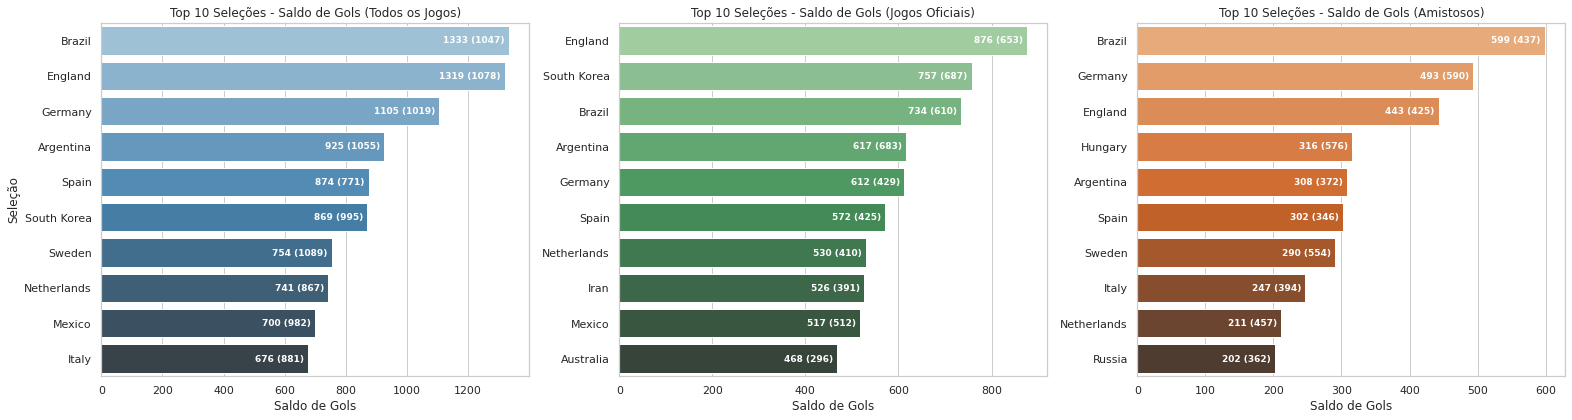

In [0]:
# Criamos os rótulos
pdf_total_goal_diff["label"] = pdf_total_goal_diff["goal_difference"].astype(int).astype(str) + \
                               " (" + pdf_total_goal_diff["total_matches"].astype(int).astype(str) + ")"

pdf_official_goal_diff["label"] = pdf_official_goal_diff["goal_difference"].astype(int).astype(str) + \
                                  " (" + pdf_official_goal_diff["total_matches"].astype(int).astype(str) + ")"

pdf_friendly_goal_diff["label"] = pdf_friendly_goal_diff["goal_difference"].astype(int).astype(str) + \
                                  " (" + pdf_friendly_goal_diff["total_matches"].astype(int).astype(str) + ")"

# Criação dos gráficos
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Lista com dados e títulos
graficos = [
    (pdf_total_goal_diff, "Top 10 Seleções - Saldo de Gols (Todos os Jogos)", "Blues_d"),
    (pdf_official_goal_diff, "Top 10 Seleções - Saldo de Gols (Jogos Oficiais)", "Greens_d"),
    (pdf_friendly_goal_diff, "Top 10 Seleções - Saldo de Gols (Amistosos)", "Oranges_d")
]

for i, (df, titulo, paleta) in enumerate(graficos):
    ax = axs[i]
    sns.barplot(
        ax=ax,
        data=df,
        y="team",
        x="goal_difference",
        palette=paleta
    )
    ax.set_title(titulo)
    ax.set_xlabel("Saldo de Gols")

    if i == 0:
        ax.set_ylabel("Seleção")
    else:
        ax.set_ylabel("")

    for j, row in df.iterrows():
        ax.text(
            row["goal_difference"] - max(df["goal_difference"]) * 0.01,
            j,
            row["label"],
            color="white",
            va="center",
            ha="right",
            fontsize=9,
            fontweight="bold"
        )

plt.tight_layout()
plt.show()


A análise do saldo de gols absoluto confirma a dominância de seleções historicamente bem-sucedidas, como Brasil, Inglaterra e Alemanha, que lideram a estatística considerando todas as partidas disputadas. O Brasil se destaca como a seleção com o maior saldo de gols geral (1.333), evidenciando sua força tanto ofensiva quanto defensiva ao longo da história. No recorte de jogos oficiais, a Inglaterra assume a liderança (876), seguida por Coreia do Sul (757) e Brasil (734), o que sugere que algumas seleções conseguem manter um desempenho superior em competições oficiais. Já nos amistosos, o Brasil volta a liderar com folga (599), mostrando seu poderio em jogos preparatórios.

Optamos por utilizar o saldo de gols absoluto em vez da média por partida, pois essa métrica reflete com mais precisão a grandeza e o impacto das seleções no cenário internacional. O saldo médio poderia favorecer equipes com poucos jogos disputados, distorcendo a percepção sobre sua real competitividade. Dessa forma, ao analisar o saldo acumulado ao longo da história, destacamos seleções que, além de vencerem com frequência, o fazem de maneira convincente, impondo vantagem sobre seus adversários em diversas competições.

### 4. **Qual seleção tem o maior número de vitórias contra outras grandes seleções (top 10 do ranking da FIFA)?**
Para avaliar a competitividade das seleções contra as equipes mais fortes do mundo, analisamos o número de vitórias conquistadas contra adversários que estavam entre os 10 primeiros colocados do ranking da FIFA na data da partida. Como o ranking passou a ser oficialmente computado a partir de 1992, esta análise considera apenas jogos disputados a partir desse ano, garantindo que os confrontos reflitam a força relativa das equipes de acordo com um critério padronizado e oficial.

Para uma visão mais aprofundada, segmentamos os resultados em três categorias: (1) todas as partidas, (2) apenas jogos oficiais e (3) exclusivamente amistosos. Essa abordagem permite compreender melhor o desempenho das seleções em diferentes contextos competitivos e identificar quais delas mais se destacam em confrontos contra a elite do futebol mundial.


In [0]:
%sql
SELECT team, COUNT(*) AS total_wins
FROM (
    SELECT home_team AS team
    FROM gold.match_performance
    WHERE home_score > away_score AND away_team_rank <= 10

    UNION ALL

    SELECT away_team AS team
    FROM gold.match_performance
    WHERE away_score > home_score AND home_team_rank <= 10
) AS victories
GROUP BY team
ORDER BY total_wins DESC
LIMIT 10;

team,total_wins
France,49
Brazil,47
Germany,40
Argentina,37
Spain,36
Netherlands,30
England,29
Italy,23
Portugal,22
Denmark,21


In [0]:
%sql
SELECT team, COUNT(*) AS official_wins
FROM (
    SELECT home_team AS team
    FROM gold.match_performance
    WHERE home_score > away_score AND away_team_rank <= 10
          AND tournament <> 'Friendly'

    UNION ALL

    SELECT away_team AS team
    FROM gold.match_performance
    WHERE away_score > home_score AND home_team_rank <= 10
          AND tournament <> 'Friendly'
) AS official_victories
GROUP BY team
ORDER BY official_wins DESC
LIMIT 10;

team,official_wins
France,29
Brazil,29
Germany,23
Argentina,19
Spain,18
Italy,17
England,17
Netherlands,16
Portugal,15
Croatia,14


In [0]:
%sql
SELECT team, COUNT(*) AS friendly_wins
FROM (
    SELECT home_team AS team
    FROM gold.match_performance
    WHERE home_score > away_score AND away_team_rank <= 10
          AND tournament = 'Friendly'

    UNION ALL

    SELECT away_team AS team
    FROM gold.match_performance
    WHERE away_score > home_score AND home_team_rank <= 10
          AND tournament = 'Friendly'
) AS friendly_victories
GROUP BY team
ORDER BY friendly_wins DESC
LIMIT 10;

team,friendly_wins
France,20
Argentina,18
Spain,18
Brazil,18
Germany,17
Netherlands,14
England,12
Denmark,9
United States,8
Sweden,7


In [0]:
# Converter os resultados para Pandas
pdf_top10_all = spark.sql("""
    SELECT team, COUNT(*) AS total_wins
    FROM (
        SELECT home_team AS team
        FROM gold.match_performance
        WHERE home_score > away_score AND away_team_rank <= 10
        UNION ALL
        SELECT away_team AS team
        FROM gold.match_performance
        WHERE away_score > home_score AND home_team_rank <= 10
    ) AS victories
    GROUP BY team
    ORDER BY total_wins DESC
    LIMIT 10
""").toPandas()

pdf_top10_official = spark.sql("""
    SELECT team, COUNT(*) AS official_wins
    FROM (
        SELECT home_team AS team
        FROM gold.match_performance
        WHERE home_score > away_score AND away_team_rank <= 10
              AND tournament <> 'Friendly'
        UNION ALL
        SELECT away_team AS team
        FROM gold.match_performance
        WHERE away_score > home_score AND home_team_rank <= 10
              AND tournament <> 'Friendly'
    ) AS official_victories
    GROUP BY team
    ORDER BY official_wins DESC
    LIMIT 10
""").toPandas()

pdf_top10_friendly = spark.sql("""
    SELECT team, COUNT(*) AS friendly_wins
    FROM (
        SELECT home_team AS team
        FROM gold.match_performance
        WHERE home_score > away_score AND away_team_rank <= 10
              AND tournament = 'Friendly'
        UNION ALL
        SELECT away_team AS team
        FROM gold.match_performance
        WHERE away_score > home_score AND home_team_rank <= 10
              AND tournament = 'Friendly'
    ) AS friendly_victories
    GROUP BY team
    ORDER BY friendly_wins DESC
    LIMIT 10
""").toPandas()


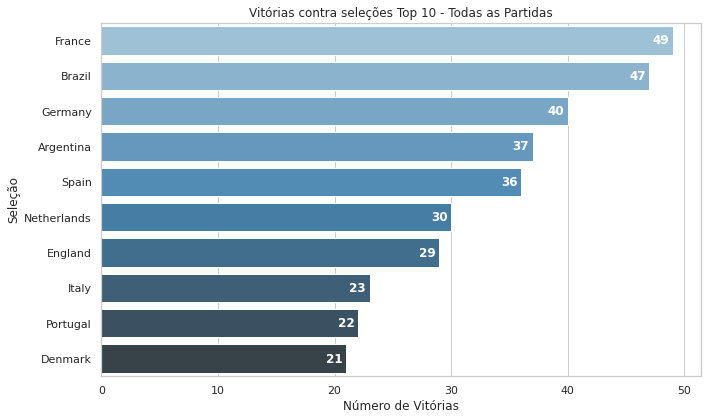

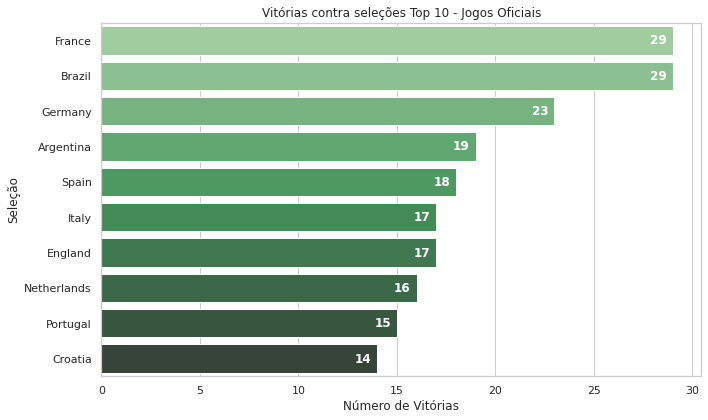

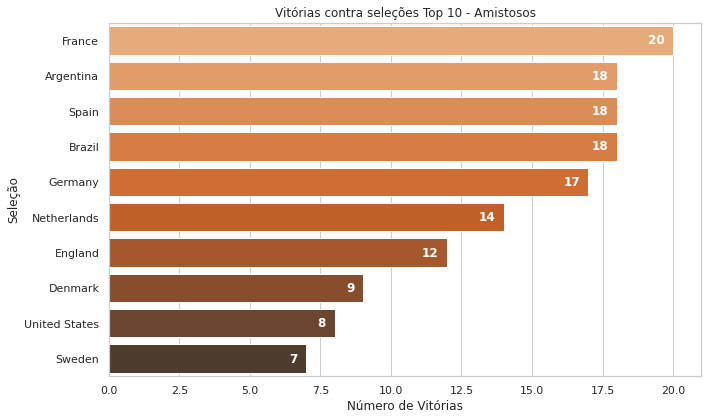

In [0]:
# --- Gráfico 1: Todas as partidas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pdf_top10_all,
    y="team",
    x="total_wins",
    palette="Blues_d"
)
plt.title("Vitórias contra seleções Top 10 - Todas as Partidas")
plt.xlabel("Número de Vitórias")
plt.ylabel("Seleção")

for i, row in pdf_top10_all.iterrows():
    plt.text(row["total_wins"] - 0.3, i, row["total_wins"], color="white",
             va="center", ha="right", fontweight="bold")
plt.tight_layout()
plt.show()

# --- Gráfico 2: Apenas jogos oficiais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pdf_top10_official,
    y="team",
    x="official_wins",
    palette="Greens_d"
)
plt.title("Vitórias contra seleções Top 10 - Jogos Oficiais")
plt.xlabel("Número de Vitórias")
plt.ylabel("Seleção")

for i, row in pdf_top10_official.iterrows():
    plt.text(row["official_wins"] - 0.3, i, row["official_wins"], color="white",
             va="center", ha="right", fontweight="bold")
plt.tight_layout()
plt.show()

# --- Gráfico 3: Apenas amistosos
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pdf_top10_friendly,
    y="team",
    x="friendly_wins",
    palette="Oranges_d"
)
plt.title("Vitórias contra seleções Top 10 - Amistosos")
plt.xlabel("Número de Vitórias")
plt.ylabel("Seleção")

for i, row in pdf_top10_friendly.iterrows():
    plt.text(row["friendly_wins"] - 0.3, i, row["friendly_wins"], color="white",
             va="center", ha="right", fontweight="bold")
plt.tight_layout()
plt.show()



Os resultados desta análise revelam que França, Brasil e Alemanha lideram em número de vitórias contra seleções que ocupavam o top 10 do ranking da FIFA, reforçando suas posições como potências históricas do futebol moderno.
A França se destaca como a seleção com mais vitórias no geral, mantendo um desempenho consistente tanto em competições oficiais quanto em amistosos.
O Brasil, tradicionalmente uma das equipes mais dominantes do futebol mundial, aparece em segundo lugar, demonstrando equilíbrio entre torneios oficiais e partidas amistosas.
Já a Alemanha, conhecida por sua consistência e competitividade, também figura entre as três primeiras, consolidando-se como uma equipe capaz de superar adversários de elite.

Ao segmentarmos os jogos, notamos variações interessantes.
Nos jogos oficiais, França e Brasil seguem no topo, evidenciando sua capacidade de se impor contra adversários fortes em contextos de alta competitividade.
Nos amistosos, Argentina e Espanha aparecem com bons desempenhos, possivelmente aproveitando esse tipo de confronto para testar elencos competitivos.
Essas diferenças mostram que, embora algumas seleções mantenham alta performance independentemente do contexto, outras tendem a ter variações de desempenho conforme a natureza do confronto.

### 5. **Qual seleção tem a maior sequência invicta em toda a história?**  
Ao longo da história do futebol, algumas seleções conseguiram manter longas sequências invictas, demonstrando consistência, resiliência e domínio sobre seus adversários.
Essas séries invictas podem ocorrer tanto em torneios oficiais quanto em amistosos, mas, independentemente do contexto, refletem a capacidade de uma equipe em sustentar um alto nível de desempenho ao longo do tempo.
Para identificar as maiores sequências, analisaremos o histórico de jogos de cada seleção e destacaremos as maiores séries consecutivas de partidas sem derrotas — considerando vitórias e empates.

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW match_result_per_team AS
SELECT 
    match_id,
    match_date,
    home_team AS team,
    away_team AS opponent,
    home_score AS team_score,
    away_score AS opponent_score,
    home_team_rank AS team_rank,
    away_team_rank AS opponent_rank,
    tournament,
    is_neutral,
    'Home' AS home_away,
    CASE 
        WHEN home_score > away_score THEN 'W'
        WHEN home_score = away_score THEN 'D'
        ELSE 'L'
    END AS result
FROM gold.match_performance

UNION ALL

SELECT 
    match_id,
    match_date,
    away_team AS team,
    home_team AS opponent,
    away_score AS team_score,
    home_score AS opponent_score,
    away_team_rank AS team_rank,
    home_team_rank AS opponent_rank,
    tournament,
    is_neutral,
    'Away' AS home_away,
    CASE 
        WHEN away_score > home_score THEN 'W'
        WHEN away_score = home_score THEN 'D'
        ELSE 'L'
    END AS result
FROM gold.match_performance;



In [0]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Carrega os dados da visão temporária
df = spark.sql("SELECT * FROM match_result_per_team")

# Cria a coluna de invencibilidade (1 para vitórias ou empates)
df = df.withColumn(
    "is_unbeaten", F.when(F.col("result").isin("W", "D"), 1).otherwise(0)
)

# Cria janela para ordenação por time e data
window = Window.partitionBy("team").orderBy("match_date")

# Cria coluna de ID incremental de quebras de sequência
df = df.withColumn("unbeaten_group", 
    F.sum(F.when(F.col("is_unbeaten") == 0, 1).otherwise(0)).over(window)
)

# Filtra só os jogos invictos
df_unbeaten = df.filter(F.col("is_unbeaten") == 1)

# Agrupa para contar o tamanho das sequências invictas
streaks = df_unbeaten.groupBy("team", "unbeaten_group").agg(
    F.count("*").alias("streak_length"),
    F.min("match_date").alias("start_date"),
    F.max("match_date").alias("end_date")
)

# Encontra a maior sequência de cada seleção
max_streaks = streaks.groupBy("team").agg(
    F.max("streak_length").alias("max_streak")
)

# Junta com os detalhes da sequência (renomeando `streaks` para evitar ambiguidade)
streaks_renamed = streaks.alias("s")
max_streaks_renamed = max_streaks.alias("m")

final = max_streaks_renamed.join(
    streaks_renamed,
    (F.col("m.team") == F.col("s.team")) &
    (F.col("m.max_streak") == F.col("s.streak_length"))
).select(
    F.col("m.team"),
    F.col("m.max_streak"),
    F.col("s.start_date"),
    F.col("s.end_date")
).orderBy(F.desc("max_streak"))

# Converte o DataFrame final do Spark para Pandas
final_pd = final.toPandas()

final_pd.head(15)
# Exibe o resultado
#final.show(15, truncate=False)

,team,max_streak,start_date,end_date
0,Algeria,42,2018-11-18,2022-01-11
1,Italy,37,2018-10-10,2021-09-08
2,Argentina,36,2019-07-06,2022-11-16
3,Brazil,35,1993-12-16,1996-01-18
4,Spain,35,2007-02-07,2009-06-20
5,France,29,1994-02-16,1996-10-09
6,South Korea,29,1977-09-03,1978-12-29
7,Colombia,27,2022-03-24,2024-07-10
8,Senegal,27,2015-11-13,2018-05-31
9,Ivory Coast,26,2011-02-08,2013-01-30


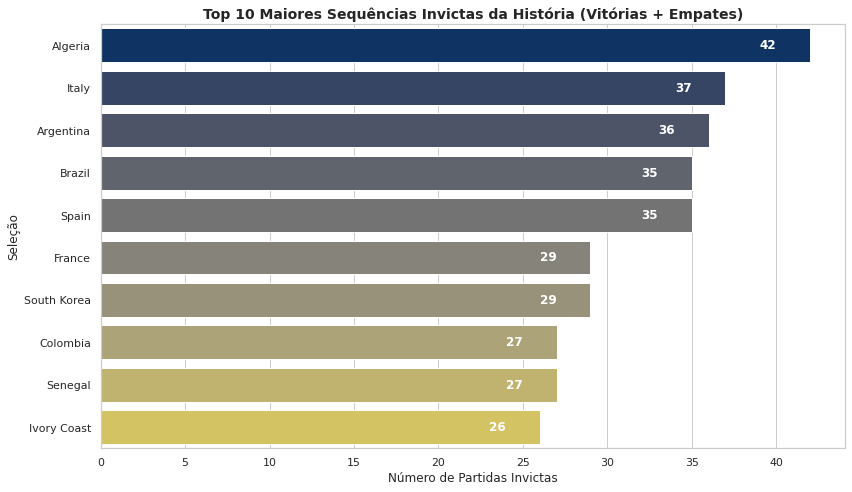

In [0]:
# Ordena os dados do Pandas DataFrame
final_pd_sorted = final_pd.sort_values(by="max_streak", ascending=False).head(10)

# Configura o estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Cria o gráfico de barras
barplot = sns.barplot(
    data=final_pd_sorted,
    y="team",
    x="max_streak",
    palette="cividis"
)

# Títulos e rótulos
plt.title("Top 10 Maiores Sequências Invictas da História (Vitórias + Empates)",
          fontsize=14, fontweight="bold")
plt.xlabel("Número de Partidas Invictas")
plt.ylabel("Seleção")

# Adiciona os valores dentro das barras
for index, row in final_pd_sorted.iterrows():
    barplot.text(
        row["max_streak"] - 2,  # deslocamento horizontal
        index,
        str(row["max_streak"]),
        color="white",
        ha='right',
        va='center',
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


In [0]:
%sql
-- Etapa 1: unificar os resultados (casa e fora)
WITH matches AS (
    SELECT match_id, match_date, home_team AS team,
           CASE 
               WHEN home_score > away_score THEN 'W'
               WHEN home_score = away_score THEN 'D'
               ELSE 'L'
           END AS result
    FROM gold.match_performance
    UNION ALL
    SELECT match_id, match_date, away_team AS team,
           CASE 
               WHEN away_score > home_score THEN 'W'
               WHEN away_score = home_score THEN 'D'
               ELSE 'L'
           END AS result
    FROM gold.match_performance
),

-- Etapa 2: streaks invictas identificadas pela soma cumulativa de derrotas
streaks AS (
    SELECT team, match_date, result,
           SUM(CASE WHEN result = 'L' THEN 1 ELSE 0 END) 
           OVER (PARTITION BY team ORDER BY match_date) AS loss_streak
    FROM matches
),

-- Etapa 3: numerar os jogos dentro de cada streak
numbered_streaks AS (
    SELECT team, match_date, result, loss_streak,
           ROW_NUMBER() OVER (PARTITION BY team, loss_streak ORDER BY match_date) AS streak_index
    FROM streaks
),

-- Etapa 4: agrupar streaks e contar vitórias
grouped_streaks AS (
    SELECT team, loss_streak,
           COUNT(*) AS streak_length,
           SUM(CASE WHEN result = 'W' THEN 1 ELSE 0 END) AS wins_count
    FROM numbered_streaks
    WHERE result IN ('W', 'D')
    GROUP BY team, loss_streak
    HAVING COUNT(*) >= 13  -- 🔥 AQUI aplicamos o novo filtro!
),

-- Etapa 5: selecionar a maior streak de cada seleção
team_best_streaks AS (
    SELECT team, MAX(streak_length) AS max_streak,
           MAX(wins_count) AS max_wins
    FROM grouped_streaks
    GROUP BY team
),

-- Etapa 6: selecionar a maior de todas (priorizando vitórias em caso de empate)
ranked_streaks AS (
    SELECT team, max_streak, max_wins,
           RANK() OVER (ORDER BY max_streak DESC, max_wins DESC) AS ranking
    FROM team_best_streaks
)

-- Resultado final: quem teve a maior sequência invicta da história (mínimo 10 jogos)
SELECT team, max_streak, max_wins
FROM ranked_streaks
ORDER BY max_streak DESC, max_wins DESC
LIMIT 10;


team,max_streak,max_wins
Algeria,42,30
Italy,37,28
Argentina,36,25
Spain,35,32
Brazil,35,29
South Korea,29,24
France,29,19
Colombia,27,21
Senegal,27,16
Ivory Coast,26,20


In [0]:
%sql
-- 1. CTE com todos os jogos normalizados
WITH all_matches AS (
  SELECT 
    match_id,
    match_date,
    'home' AS side,
    home_team AS team,
    away_team AS opponent,
    home_score AS goals_for,
    away_score AS goals_against
  FROM gold.match_performance

  UNION ALL

  SELECT 
    match_id,
    match_date,
    'away' AS side,
    away_team AS team,
    home_team AS opponent,
    away_score AS goals_for,
    home_score AS goals_against
  FROM gold.match_performance
),

-- 2. Adiciona resultado e década
match_results AS (
  SELECT *,
    CASE 
      WHEN goals_for > goals_against THEN 'W'
      WHEN goals_for = goals_against THEN 'D'
      ELSE 'L'
    END AS result,
    CONCAT(FLOOR(YEAR(match_date) / 10) * 10, 's') AS decade
  FROM all_matches
),

-- 3. Cria um contador de derrotas para agrupar streaks
with_streaks AS (
  SELECT *,
    SUM(CASE WHEN result = 'L' THEN 1 ELSE 0 END)
      OVER (PARTITION BY team, decade ORDER BY match_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) 
      AS loss_count
  FROM match_results
),

-- 4. Agrupa streaks de invencibilidade
streaks_grouped AS (
  SELECT
    team,
    decade,
    loss_count,
    COUNT(*) AS streak_length
  FROM with_streaks
  WHERE result IN ('W', 'D')
  GROUP BY team, decade, loss_count
  HAVING COUNT(*) >= 10  -- 👈 filtro de sequência mínima
),

-- 5. Encontra maior sequência invicta por seleção e década
max_streaks_per_team_decade AS (
  SELECT
    team,
    decade,
    MAX(streak_length) AS max_unbeaten_streak
  FROM streaks_grouped
  GROUP BY team, decade
),

-- 6. Seleciona a melhor por década
ranked_by_decade AS (
  SELECT *,
    ROW_NUMBER() OVER (PARTITION BY decade ORDER BY max_unbeaten_streak DESC) AS rank
  FROM max_streaks_per_team_decade
)

-- Resultado final
SELECT team, decade, max_unbeaten_streak
FROM ranked_by_decade
WHERE rank = 1
ORDER BY decade;


team,decade,max_unbeaten_streak
Scotland,1880s,21
England,1890s,20
England,1900s,16
Hungary,1910s,15
Argentina,1920s,15
Italy,1930s,26
Argentina,1940s,15
Brazil,1950s,21
Brazil,1960s,21
South Korea,1970s,29


In [0]:
# Executa a query e carrega o resultado em um DataFrame do Spark
df_decade_unbeaten = spark.sql("""
  WITH all_matches AS (
    SELECT 
      match_id,
      match_date,
      'home' AS side,
      home_team AS team,
      away_team AS opponent,
      home_score AS goals_for,
      away_score AS goals_against
    FROM gold.match_performance

    UNION ALL

    SELECT 
      match_id,
      match_date,
      'away' AS side,
      away_team AS team,
      home_team AS opponent,
      away_score AS goals_for,
      home_score AS goals_against
    FROM gold.match_performance
  ),

  match_results AS (
    SELECT *,
      CASE 
        WHEN goals_for > goals_against THEN 'W'
        WHEN goals_for = goals_against THEN 'D'
        ELSE 'L'
      END AS result,
      CONCAT(FLOOR(YEAR(match_date) / 10) * 10, 's') AS decade
    FROM all_matches
  ),

  with_streaks AS (
    SELECT *,
      SUM(CASE WHEN result = 'L' THEN 1 ELSE 0 END)
        OVER (PARTITION BY team, decade ORDER BY match_date 
              ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) 
        AS loss_count
    FROM match_results
  ),

  streaks_grouped AS (
    SELECT
      team,
      decade,
      loss_count,
      COUNT(*) AS streak_length
    FROM with_streaks
    WHERE result IN ('W', 'D')
    GROUP BY team, decade, loss_count
    HAVING COUNT(*) >= 10
  ),

  max_streaks_per_team_decade AS (
    SELECT
      team,
      decade,
      MAX(streak_length) AS max_unbeaten_streak
    FROM streaks_grouped
    GROUP BY team, decade
  ),

  ranked_by_decade AS (
    SELECT *,
      ROW_NUMBER() OVER (PARTITION BY decade 
                         ORDER BY max_unbeaten_streak DESC) AS rank
    FROM max_streaks_per_team_decade
  )

  SELECT team, decade, max_unbeaten_streak
  FROM ranked_by_decade
  WHERE rank = 1
  ORDER BY decade
""")

# Converte para Pandas
pdf_decade_unbeaten = df_decade_unbeaten.toPandas()

# Visualiza o DataFrame
pdf_decade_unbeaten


,team,decade,max_unbeaten_streak
0,Scotland,1880s,21
1,England,1890s,20
2,England,1900s,16
3,Hungary,1910s,15
4,Argentina,1920s,15
5,Italy,1930s,26
6,Argentina,1940s,15
7,Brazil,1950s,21
8,Brazil,1960s,21
9,South Korea,1970s,29


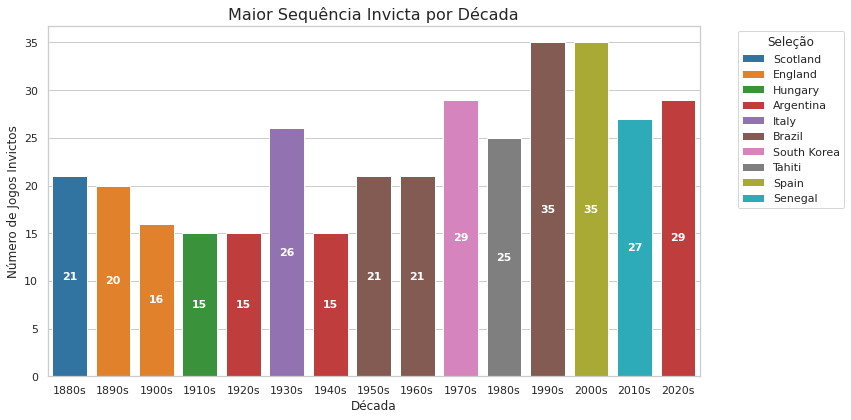

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Garante ordem correta das décadas
pdf_decade_unbeaten['decade'] = pd.Categorical(
    pdf_decade_unbeaten['decade'], 
    categories=sorted(pdf_decade_unbeaten['decade'].unique()), 
    ordered=True
)

# Define estilo visual e paleta
sns.set_style("whitegrid")
sns.set_palette("tab10")

# Cria figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=pdf_decade_unbeaten,
    x="decade",
    y="max_unbeaten_streak",
    hue="team",
    dodge=False
)

# Adiciona os valores dentro das barras
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height / 2),  # Centraliza verticalmente
            ha='center', va='center', 
            color='white', fontsize=11, fontweight='bold'
        )

# Títulos e ajustes
plt.title("Maior Sequência Invicta por Década", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Número de Jogos Invictos", fontsize=12)
plt.legend(title="Seleção", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 🔹 Top 10 Sequências Invictas da História

A **Argélia** lidera com **42 jogos invictos**, enfrentando 30 adversários diferentes. Em seguida, aparecem **Itália (37 jogos)**, **Argentina (36)**, **Espanha** e **Brasil** (ambos com **35**). Se destacam também seleções como **Coreia do Sul**, **França**, **Colômbia**, **Senegal** e **Costa do Marfim**, mostrando que longas sequências invictas não são exclusivas das potências tradicionais.

#### 🔹 Maiores Sequências Invictas por Década

Desde o século XIX, diferentes seleções dominaram períodos específicos. Destaques incluem:

- **Escócia** nos anos 1880 (21 jogos)  
- **Brasil** nas décadas de 1950, 1960 e 1990  
- **Espanha** nos anos 2000 (35 jogos)  
- **Senegal** na década de 2010 (27 jogos)  
- E a atual campeã mundial, **Argentina**, liderando os anos 2020 com 29 jogos invictos

Esses dados mostram como o domínio no futebol de seleções varia ao longo do tempo e entre continentes.


Os resultados revelam o domínio prolongado de algumas seleções ao longo da história do futebol internacional. A Argélia se destaca com a maior sequência invicta geral, alcançando 42 jogos sem derrota. Na sequência, Itália, Argentina, Espanha e Brasil também superam a marca de 35 partidas, demonstrando períodos de alto desempenho e consistência técnica. Ao analisarmos por década, observamos que a Itália nos anos 1930, o Brasil nos anos 1990 e a Espanha nos anos 2000 mantiveram longas séries invictas, refletindo o auge competitivo de suas gerações.

A análise segmentada por tipo de torneio mostra que seleções como o Brasil e a Espanha conseguiram estender essas séries tanto em amistosos quanto em competições oficiais, evidenciando um desempenho sólido independentemente do contexto. Já a Coreia do Sul surpreende com uma impressionante sequência oficial de 33 jogos invictos na década de 1970. Além das potências tradicionais, os dados também destacam o crescimento de seleções como Senegal, Irã e Argélia, que alcançaram marcas expressivas nas décadas mais recentes. Esses padrões reforçam como o desempenho sustentado ao longo do tempo é um dos principais indicadores de excelência no futebol de seleções.

### 6. **Qual seleção tem o maior número de jogos sem sofrer gols em toda a história?**  
Manter uma defesa sólida é um dos pilares do sucesso no futebol, sendo muitas vezes determinante em competições equilibradas. Uma equipe que consegue impedir seus adversários de marcar demonstra não apenas organização tática e eficiência defensiva, mas também um alto nível de concentração ao longo das partidas.

Nesta análise, buscamos identificar as seleções que mais vezes conseguiram terminar jogos sem sofrer gols — também conhecidos como clean sheets. Esse indicador é uma métrica tradicionalmente utilizada para avaliar a consistência defensiva de uma equipe ao longo do tempo. A análise considera tanto partidas amistosas quanto oficiais, abrangendo todo o histórico disponível no conjunto de dados, e revela quais seleções conseguiram se destacar por sua solidez defensiva ao longo das décadas.

In [0]:
%sql
SELECT team, COUNT(*) AS clean_sheets
FROM (
    SELECT home_team AS team
    FROM gold.match_performance
    WHERE away_score = 0

    UNION ALL

    SELECT away_team AS team
    FROM gold.match_performance
    WHERE home_score = 0
) AS clean_sheet_matches
GROUP BY team
ORDER BY clean_sheets DESC
LIMIT 10;

team,clean_sheets
Brazil,467
South Korea,459
England,446
Argentina,410
Mexico,402
Sweden,357
Italy,354
Germany,350
France,331
Spain,331


In [0]:
# 1. Seleciona os jogos em que o time mandante não sofreu gols
home_clean_sheets = spark.sql("""
    SELECT home_team AS team
    FROM gold.match_performance
    WHERE away_score = 0
""")

# 2. Seleciona os jogos em que o time visitante não sofreu gols
away_clean_sheets = spark.sql("""
    SELECT away_team AS team
    FROM gold.match_performance
    WHERE home_score = 0
""")

# 3. Junta ambos os casos
clean_sheets_df = home_clean_sheets.union(away_clean_sheets)

# 4. Conta quantas vezes cada time não sofreu gols
top_clean_sheets = (
    clean_sheets_df.groupBy("team")
    .count()
    .withColumnRenamed("count", "clean_sheets")
    .orderBy("clean_sheets", ascending=False)
    .limit(10)
)

# 5. Converte para Pandas
pdf_clean_sheets = top_clean_sheets.toPandas()


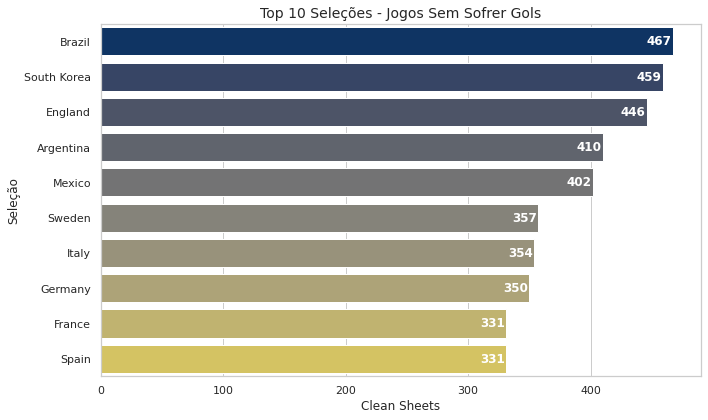

In [0]:
# Ordena o DataFrame por segurança
pdf_clean_sheets = pdf_clean_sheets.sort_values(by="clean_sheets", ascending=False)

# Cria o gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=pdf_clean_sheets,
    y="team",
    x="clean_sheets",
    palette=sns.color_palette("cividis", n_colors=10) 
)

# Adiciona valores dentro das barras
for i, (value, team) in enumerate(
    zip(pdf_clean_sheets["clean_sheets"], pdf_clean_sheets["team"])
):
    barplot.text(
        value - 1, i, str(value),
        color="white", ha="right", va="center", fontweight="bold"
    )

plt.title("Top 10 Seleções - Jogos Sem Sofrer Gols", fontsize=14)
plt.xlabel("Clean Sheets")
plt.ylabel("Seleção")
plt.tight_layout()
plt.show()


Os dados revelam que o Brasil é a seleção com o maior número de partidas sem sofrer gols na história, totalizando impressionantes 467 jogos. Esse número reflete não apenas a tradição ofensiva da equipe, mas também a solidez de sua estrutura defensiva ao longo das décadas. Logo atrás, aparece a Coreia do Sul, com 459 partidas — um dado que chama a atenção e evidencia a consistência defensiva da seleção asiática em sua trajetória internacional.

Na sequência, seleções tradicionais como Inglaterra, Argentina, México, Suécia, Itália, Alemanha, França e Espanha completam o top 10. A presença recorrente dessas equipes nos grandes torneios internacionais ajuda a explicar esse alto número de clean sheets, já que possuem historicamente calendários recheados de jogos e elencos competitivos.

Os resultados reforçam que manter a solidez defensiva é uma característica marcante das seleções mais bem-sucedidas ao longo do tempo, sendo um componente essencial para a construção de equipes vencedoras.

### 7. **Quais seleções tiveram os artilheiros mais consistentes e como o desempenho desses jogadores está relacionado com o sucesso da equipe?**  

Ao longo da história do futebol, grandes artilheiros marcaram época não apenas pelo número de gols, mas também pelo impacto direto que tiveram no desempenho de suas seleções. Esta análise busca identificar os jogadores mais consistentes em termos de gols marcados por partidas e relacionar essa produtividade individual com o sucesso coletivo de suas equipes.

Mais do que apenas contabilizar gols, o objetivo é compreender como esses atletas influenciaram as vitórias, classificações e títulos de suas seleções. A presença de um artilheiro confiável pode representar um diferencial decisivo em partidas equilibradas e torneios de alto nível, servindo como pilar ofensivo e referência tática. Assim, ao observarmos os maiores goleadores e o contexto de seus desempenhos, conseguimos traçar conexões entre brilho individual e conquistas coletivas, revelando como grandes talentos influenciam diretamente a história do futebol de seleções.

In [0]:
%sql
-- Análise 1: Artilheiros mais impactantes por gols marcados
SELECT
    player_name,
    team_name,
    total_goals,
    matches_scored,
    max_goals_in_a_game,
    hat_tricks,
    penalty_goals,
    own_goals
FROM gold.top_scorers
ORDER BY total_goals DESC
LIMIT 20;





player_name,team_name,total_goals,matches_scored,max_goals_in_a_game,hat_tricks,penalty_goals,own_goals
Cristiano Ronaldo,Portugal,108,67,4,10,19,0
Robert Lewandowski,Poland,63,40,4,6,13,0
Romelu Lukaku,Belgium,60,37,4,3,6,0
Harry Kane,England,58,42,4,5,20,0
Lionel Messi,Argentina,55,44,3,3,14,0
Edin Džeko,Bosnia and Herzegovina,50,38,3,2,2,0
Ali Daei,Iran,49,34,4,3,8,0
Miroslav Klose,Germany,48,34,3,2,0,0
Luis Suárez,Uruguay,47,37,4,1,9,0
Aleksandar Mitrović,Serbia,47,32,3,2,2,0


In [0]:
%sql
-- Análise 2: Desempenho da seleção nos jogos em que o jogador marcou gol

WITH top20_scorers AS (
  SELECT player_name, team_name
  FROM gold.top_scorers
  ORDER BY total_goals DESC
  LIMIT 20
),

scorer_goals AS (
  SELECT
    gs.match_id,
    gs.scorer AS player_name,
    gs.scoring_team AS team_name
  FROM silver.goalscorers AS gs
  INNER JOIN top20_scorers AS t20
    ON gs.scorer = t20.player_name
),

scorer_results AS (
  SELECT
    sg.player_name,
    sg.team_name,
    mp.match_id,
    CASE
      WHEN sg.team_name = mp.home_team AND mp.home_score > mp.away_score THEN 'Win'
      WHEN sg.team_name = mp.away_team AND mp.away_score > mp.home_score THEN 'Win'
      WHEN mp.home_score = mp.away_score THEN 'Draw'
      ELSE 'Loss'
    END AS result
  FROM scorer_goals AS sg
  INNER JOIN gold.match_performance AS mp
    ON sg.match_id = mp.match_id
)

SELECT
  player_name,
  team_name,
  COUNT(*) AS matches_with_goals,
  SUM(CASE WHEN result = 'Win' THEN 1 ELSE 0 END) AS wins_when_scored,
  SUM(CASE WHEN result = 'Draw' THEN 1 ELSE 0 END) AS draws_when_scored,
  SUM(CASE WHEN result = 'Loss' THEN 1 ELSE 0 END) AS losses_when_scored,
  ROUND(SUM(CASE WHEN result = 'Win' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 1) AS win_rate_when_scored
FROM scorer_results
GROUP BY player_name, team_name
ORDER BY win_rate_when_scored DESC;


player_name,team_name,matches_with_goals,wins_when_scored,draws_when_scored,losses_when_scored,win_rate_when_scored
David Villa,Spain,41,38,1,2,92.7
Ronaldo,Brazil,39,36,3,0,92.3
Gerd Müller,Germany,39,35,2,2,89.7
Romelu Lukaku,Belgium,60,53,4,3,88.3
Cristiano Ronaldo,Portugal,108,95,9,4,88.0
Harry Kane,England,58,50,6,2,86.2
Hakan Şükür,Turkey,39,33,4,2,84.6
Ali Daei,Iran,49,41,3,5,83.7
Lionel Messi,Argentina,55,46,7,2,83.6
Miroslav Klose,Germany,48,40,8,0,83.3


### 8. Quais seleções têm o melhor desempenho em disputas de pênaltis e como isso contribuiu para sua trajetória em torneios importantes?

As disputas de pênaltis representam um dos momentos mais dramáticos e decisivos do futebol, especialmente em torneios eliminatórios. Saber lidar com essa pressão é um diferencial que pode mudar o rumo de uma competição. Nesta análise, exploramos quais seleções se destacam nesse aspecto, avaliando seu desempenho histórico em disputas de pênaltis com base na frequência de vitórias e taxa de aproveitamento. Ao observar quais equipes mais venceram nessas situações e com que eficiência o fizeram, conseguimos entender o papel crucial dessas disputas na consolidação do sucesso de uma seleção em torneios internacionais.

In [0]:
%sql
SELECT 
    team,
    COUNT(CASE WHEN is_winner = 1 THEN 1 END) AS penalty_victories,
    COUNT(*) AS penalty_participations,
    ROUND(
        COUNT(CASE WHEN is_winner = 1 THEN 1 END) * 100.0 / COUNT(*),
        1
    ) AS penalty_win_rate
FROM (
    SELECT 
        penalty_winner AS team,
        1 AS is_winner
    FROM gold.penalty_shootouts

    UNION ALL

    SELECT 
        penalty_loser AS team,
        0 AS is_winner
    FROM gold.penalty_shootouts
) AS all_penalty_matches
GROUP BY team
HAVING COUNT(*) >= 6
ORDER BY penalty_win_rate DESC, penalty_victories DESC

team,penalty_victories,penalty_participations,penalty_win_rate
Padania,6,6,100.0
Indonesia,10,11,90.9
Ethiopia,7,8,87.5
Germany,6,7,85.7
Panama,5,6,83.3
Guinea,8,10,80.0
Martinique,7,9,77.8
Saudi Arabia,7,9,77.8
Iraq,11,15,73.3
Angola,7,10,70.0


In [0]:
%sql
WITH competitive_penalties AS (
  SELECT
    ps.penalty_winner AS team,
    mp.tournament
  FROM
    gold.penalty_shootouts ps
  LEFT JOIN
    gold.match_performance mp
    ON ps.match_id = mp.match_id
  WHERE
    LOWER(mp.tournament) NOT LIKE '%friendly%'
)

SELECT
  team,
  COUNT(*) AS competitive_penalty_wins
FROM
  competitive_penalties
GROUP BY
  team
ORDER BY
  competitive_penalty_wins DESC
LIMIT 15


team,competitive_penalty_wins
Argentina,15
South Korea,14
Zambia,13
Thailand,12
South Africa,11
Egypt,11
Indonesia,10
Iraq,9
Uruguay,9
Brazil,9


A análise revelou quais seleções mais se destacam em disputas de pênaltis ao longo da história, considerando tanto a eficiência (taxa de vitórias) quanto a frequência de participação nesse tipo de decisão. Entre as seleções com 100% de aproveitamento, destaca-se Padania, com seis vitórias em seis disputas. Entretanto, trata-se de uma equipe não reconhecida pela FIFA, o que pode indicar um viés amostral devido à natureza dos torneios em que participou.

Entre as seleções tradicionais, Alemanha (85,7% de aproveitamento), Argentina (65,2%) e Brasil (56,3%) demonstram um desempenho historicamente positivo em pênaltis. A Argentina, em especial, chama atenção por liderar o ranking em número absoluto de vitórias em disputas de pênaltis (15), mostrando não só eficiência, mas também recorrência nesse tipo de decisão — um fator determinante em suas campanhas de sucesso em Copas e outros torneios continentais.

Outras seleções com bom histórico incluem Indonésia (90,9% de aproveitamento em 11 disputas), Etiópia (87,5%) e Guiné (80%). Esses dados podem indicar uma competência estratégica e emocional nessas situações de alta pressão, embora também seja importante considerar a relevância dos torneios e o nível dos adversários enfrentados.

Por outro lado, equipes como Inglaterra (33,3%), Países Baixos (Holanda) (20%) e Costa Rica (22,2%) mostram baixa eficiência nesse tipo de decisão, refletindo uma dificuldade histórica que muitas vezes impactou negativamente suas trajetórias em torneios importantes.

Ao cruzar os dados de eficiência com os de participações e vitórias absolutas, conseguimos uma visão mais completa: seleções como Argentina, Coreia do Sul, Zâmbia e Tailândia aliam volume de disputas com resultados positivos, o que reforça o papel estratégico das cobranças de pênaltis na consolidação de suas campanhas ao longo dos anos.

### Questão principal do problema:



## 📌 Conclusão Geral – Qual a seleção mais dominante da história?

A análise das oito dimensões de desempenho abordadas neste projeto revela que **não há uma única seleção que domine absolutamente todos os critérios**, mas alguns países se destacam de forma consistente em diferentes aspectos, o que permite fundamentar uma escolha mais equilibrada sobre qual seleção pode ser considerada a mais dominante da história do futebol internacional.

### 🥇 Brasil
- **1º em número total de vitórias** e **1º em saldo de gols geral**.
- **Lidera em aproveitamento geral (2,11 pontos/jogo)** e **amistosos (2,24)**.
- **1º em partidas sem sofrer gols** (467 jogos).
- **2º em vitórias contra seleções do top 10 da FIFA**.
- **Top 5 em todas as análises**, incluindo sequências invictas e desempenho em pênaltis.
- Participação regular e expressiva tanto em amistosos quanto em competições oficiais.

### 🥈 Alemanha
- **1º em aproveitamento oficial (2,15 pontos/jogo)**.
- **1º em vitórias em amistosos**.
- Entre os líderes em clean sheets e saldo de gols.
- Excelente histórico em pênaltis (85,7% de aproveitamento).
- Presença entre os primeiros em vitórias contra seleções do top 10.

### 🥉 Argentina
- **Maior número de vitórias em pênaltis (15)**.
- **Longas sequências invictas**.
- Presença constante em jogos oficiais e contra seleções fortes.
- Top 3 em várias análises.

### Outros destaques relevantes:
- **Coreia do Sul**: destaque em vitórias oficiais, saldo positivo e clean sheets, mesmo com menor competitividade regional.
- **França**: **1º lugar em vitórias contra seleções do top 10 da FIFA**.
- **Espanha e Inglaterra**: ótimo aproveitamento e saldo de gols em jogos oficiais.
- **Itália** e **Argélia**: protagonistas em séries invictas históricas.

---

### 🧠 Síntese técnica

Ao cruzarmos os dados de desempenho ofensivo (gols e vitórias), defensivo (clean sheets), regularidade histórica (aproveitamento e invencibilidade), confrontos contra seleções fortes e desempenho em decisões (pênaltis), a seleção **mais presente entre os primeiros colocados em múltiplas categorias** é o **Brasil**.

Embora Alemanha e Argentina apresentem desempenhos de elite em critérios específicos, apenas o Brasil aparece de forma **recorrente no topo de praticamente todos os recortes analisados**, com equilíbrio entre:
- Número absoluto de jogos e vitórias
- Aproveitamento geral e em contextos distintos
- Adversários enfrentados
- Longevidade histórica

---

### ✅ Conclusão final

> **Com base nos dados analisados, a seleção brasileira é a que apresenta o desempenho mais completo e consistente ao longo da história do futebol internacional, sendo a escolha mais fundamentada para o título de seleção mais dominante.**


Conclusão